# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('datasets/imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We'll work only with numerical values.

The `normalized-losses` column contains missing values represented using `"?"`. We'll replace these with `NaN` and rescale the values in the range 0 to 1.

In [4]:
numerical_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numerical_cols]

In [5]:
cars  = numeric_cars.replace("?", np.nan)

In [6]:
# convert to numerical

cars = cars.astype('float')
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because we are predicting `price`, we will first drop the rows that have a missing value for price.

In [7]:
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Because `normalized-losses` column has almost 20% of its values missing, we will drop the column.

In [8]:
del cars['normalized-losses']

For the rest of columns we'll replace the missing values with its correspoding column mean.

In [9]:
cars.fillna(value=cars.mean(), axis=0, inplace=True)

In [10]:
cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

Next, we'll standardize the values.

In [11]:
price_col = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = price_col

## The model
Let's start with some univariate k-nearest neighbors models.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse


def knn_train_test_univar(feature, target, data):
    
    #shuffle the data
    np.random.seed(1)
    shuffled = np.random.permutation(data.index)
    data = data.reindex(shuffled)
    
    #split the data in half
    half = int(len(data) / 2)
    train = data.iloc[:half, :]
    test = data.iloc[half:, :]
    
    #build and train model
    clf = KNeighborsRegressor()
    clf.fit(train[[feature]], train[target])
    
    #Make predictions
    pred = clf.predict(test[[feature]])
    rmse = np.sqrt(mse(test[target], pred))
    
    return rmse

Let's try it out.

In [13]:
errors = {}

cols = cars.columns
cols = cols.drop('price')

for col in cols:
    model = knn_train_test_univar(col, 'price', cars)
    errors[col] = round(model, 2)

In [14]:
results = pd.Series(errors)

In [15]:
results.sort_values()

engine-size         3238.46
horsepower          4037.04
curb-weight         4401.12
highway-mpg         4630.03
width               4704.48
city-mpg            4766.42
length              5427.20
wheel-base          5461.55
compression-rate    6610.81
bore                6780.63
peak-rpm            7697.46
stroke              8006.53
height              8144.44
dtype: float64

Next, we'll modify the function so it takes different values for `k`.

In [16]:
def knn_train_test_univar_k(feature, target, data, k_neighbors):
    #shuffle the data
    np.random.seed(1)
    shuffled = np.random.permutation(data.index)
    data = data.reindex(shuffled)
    
    #split the data in half
    half = int(len(data) / 2)
    train = data.iloc[:half, :]
    test = data.iloc[half:, :]
    
    k_rmse = {}
    
    #build and train model
    for k in k_neighbors:
        clf = KNeighborsRegressor(n_neighbors=k)
        clf.fit(train[[feature]], train[target])
    
        #Make predictions
        pred = clf.predict(test[[feature]])
        rmse = np.sqrt(mse(test[target], pred))
        k_rmse["K_neighbors: {}".format(k)] = round(rmse,2)
    
    return k_rmse

In [17]:
errors_k = {}
k = [1, 3, 5, 7, 9]
for col in cols:
    model = knn_train_test_univar_k(col, 'price', cars, k)
    errors_k[col] = model

In [18]:
errors_k

{'wheel-base': {'K_neighbors: 1': 4493.73,
  'K_neighbors: 3': 5120.16,
  'K_neighbors: 5': 5461.55,
  'K_neighbors: 7': 5448.11,
  'K_neighbors: 9': 5738.41},
 'length': {'K_neighbors: 1': 4628.46,
  'K_neighbors: 3': 5129.84,
  'K_neighbors: 5': 5427.2,
  'K_neighbors: 7': 5313.43,
  'K_neighbors: 9': 5383.05},
 'width': {'K_neighbors: 1': 4559.26,
  'K_neighbors: 3': 4606.41,
  'K_neighbors: 5': 4704.48,
  'K_neighbors: 7': 4571.49,
  'K_neighbors: 9': 4652.91},
 'height': {'K_neighbors: 1': 8904.05,
  'K_neighbors: 3': 8277.61,
  'K_neighbors: 5': 8144.44,
  'K_neighbors: 7': 7679.6,
  'K_neighbors: 9': 7811.04},
 'curb-weight': {'K_neighbors: 1': 5264.29,
  'K_neighbors: 3': 5022.32,
  'K_neighbors: 5': 4401.12,
  'K_neighbors: 7': 4330.61,
  'K_neighbors: 9': 4632.04},
 'engine-size': {'K_neighbors: 1': 3258.49,
  'K_neighbors: 3': 2840.56,
  'K_neighbors: 5': 3238.46,
  'K_neighbors: 7': 3563.09,
  'K_neighbors: 9': 3831.82},
 'bore': {'K_neighbors: 1': 8602.59,
  'K_neighbors: 

Next, we'll modify the function so it works with multiple columns.

In [19]:
def knn_train_test_multivar(features, target, data):
    
    #shuffle the data
    np.random.seed(1)
    shuffled = np.random.permutation(data.index)
    data = data.reindex(shuffled)
    
    #split the data in half
    half = int(len(data) / 2)
    train = data.iloc[:half, :]
    test = data.iloc[half:, :]
    
    #build and train model
    clf = KNeighborsRegressor()
    clf.fit(train[features], train[target])
    
    #Make predictions
    pred = clf.predict(test[features])
    rmse = np.sqrt(mse(test[target], pred))
    
    return rmse

We'll use the best features (starting from best 2 till best 5) from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [20]:
rmse_vals = {}
for n in range(2,6):
    features = list(results.sort_values()[:n].index)
    rmse = knn_train_test_multivar(features, 'price', cars)
    rmse_vals['Model with the best {} features'.format(n)] = round(rmse, 2)

In [21]:
rmse_vals

{'Model with the best 2 features': 2949.88,
 'Model with the best 3 features': 3435.26,
 'Model with the best 4 features': 3286.56,
 'Model with the best 5 features': 3410.22}

We observe how the model performs best with the best 2 features.

Lastly, we'll optimize the hyperparameters for the best model.

In [22]:
def knn_train_test_multivar_k(features, target, data, k_neighbors):
    
    #shuffle the data
    np.random.seed(1)
    shuffled = np.random.permutation(data.index)
    data = data.reindex(shuffled)
    
    #split the data in half
    half = int(len(data) / 2)
    train = data.iloc[:half, :]
    test = data.iloc[half:, :]
    
    k_rmse = {}
    
    #build and train model
    for k in k_neighbors:
        clf = KNeighborsRegressor(n_neighbors=k)
        clf.fit(train[features], train[target])
    
        #Make predictions
        pred = clf.predict(test[features])
        rmse = np.sqrt(mse(test[target], pred))
        k_rmse["K_neighbors: {}".format(k)] = round(rmse,2)
    
    return k_rmse

In [23]:
k_neighbors = [i for i in range(1,26)]

In [24]:
errors_best_model = knn_train_test_multivar_k(['engine-size', 'horsepower'], 'price', cars, k_neighbors)

In [25]:
results = pd.Series(errors_best_model)
results = results.sort_values()

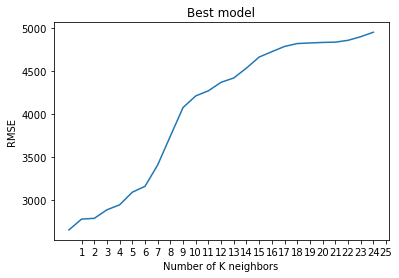

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
labels=[i for i in range(1,26)]
results.plot.line(title="Best model")
plt.xlabel('Number of K neighbors')
plt.ylabel("RMSE")
plt.xticks([])
plt.xticks(labels, labels)
plt.grid(False)

The optimal number of neighbors `k` is 2 as it's the model with the lowest `rmse`.